In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Filled-titanic.csv')

In [3]:
df_train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age stages
0,0,1,0,3,109,2,22.0,1,0,524,7.2500,82,3,2
1,1,2,1,1,191,1,NaN,1,0,597,71.2833,82,1,2
2,2,3,1,3,354,1,26.0,0,0,670,7.9250,56,3,2
3,3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3,2
4,4,5,0,3,16,2,35.0,0,0,473,8.0500,130,3,2


### Classification Model Evaluation model

1. Accuracy
2. Area Unde roc_curve
3. Confusion matrix
4. classification Report

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

model = RandomForestClassifier()


In [10]:
df_train.dropna(inplace=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
model.score(X_train, y_train)

1.0

In [14]:
cross_val_score_mean = cross_val_score(model, X, y, cv=5)

In [15]:
model_cross_val = np.mean(cross_val_score_mean)
model_cross_val

0.810062893081761

**Area Under ROC (receiver operating charesteristic) curve**
* AUC = Area Under Curve
* ROC = Receiveer operating charestarestic

ROC curve are a comparison of a model's true positive rate(tpr) versus false positive rate(tpr)

In [16]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)

y_probs[:5], len(y_probs)

(array([[0.51, 0.49],
        [0.65, 0.35],
        [0.55, 0.45],
        [0.65, 0.35],
        [0.96, 0.04]]),
 159)

In [17]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.35, 0.45, 0.35, 0.04, 0.08, 0.82, 0.19, 0.32, 0.04, 0.01,
       0.64, 0.31, 0.55, 0.45, 0.54, 0.04, 0.91, 0.03, 0.39, 0.07, 0.77,
       0.01, 0.32, 0.04, 0.1 , 0.73, 0.47, 0.35, 0.42, 0.84, 0.21, 0.85,
       0.03, 0.1 , 0.08, 0.91, 0.88, 0.9 , 0.04, 0.21, 0.67, 0.11, 0.05,
       0.16, 0.46, 0.3 , 0.09, 0.02, 0.05, 0.98, 0.22, 0.18, 0.02, 0.09,
       0.38, 0.19, 0.34, 0.15, 0.12, 0.44, 0.9 , 0.17, 0.87, 0.92, 0.08,
       0.09, 0.02, 0.05, 0.03, 0.03, 0.19, 0.21, 0.81, 0.06, 0.37, 0.36,
       0.29, 0.07, 0.07, 0.05, 0.14, 0.25, 0.28, 0.25, 0.1 , 0.08, 0.48,
       0.02, 0.54, 0.13, 0.41, 0.14, 0.04, 0.17, 0.34, 0.44, 0.92, 0.23,
       0.44, 0.17, 0.51, 0.23, 0.29, 0.18, 0.66, 0.14, 0.94, 0.17, 0.38,
       0.33, 0.06, 0.14, 0.15, 0.1 , 0.41, 0.05, 0.06, 0.59, 0.29, 0.28,
       0.15, 0.55, 0.02, 0.83, 0.59, 0.09, 0.32, 0.36, 0.61, 0.36, 0.3 ,
       0.21, 0.41, 0.02, 0.73, 0.61, 0.18, 0.  , 0.95, 0.36, 0.02, 0.81,
       0.28, 0.53, 0.42, 0.15, 0.35, 0.18, 0.08, 0.

In [18]:
len(y_probs_positive)

159

In [19]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [20]:
fpr

array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.01818182, 0.01818182, 0.01818182, 0.02727273, 0.02727273,
       0.03636364, 0.05454545, 0.05454545, 0.05454545, 0.07272727,
       0.07272727, 0.08181818, 0.08181818, 0.09090909, 0.09090909,
       0.1       , 0.1       , 0.10909091, 0.12727273, 0.14545455,
       0.16363636, 0.17272727, 0.19090909, 0.2       , 0.22727273,
       0.24545455, 0.26363636, 0.26363636, 0.28181818, 0.28181818,
       0.29090909, 0.30909091, 0.33636364, 0.37272727, 0.38181818,
       0.41818182, 0.44545455, 0.51818182, 0.52727273, 0.6       ,
       0.62727273, 0.66363636, 0.69090909, 0.73636364, 0.77272727,
       0.79090909, 0.88181818, 0.91818182, 0.97272727, 0.99090909,
       1.        ])

Ploting ROC-Curve

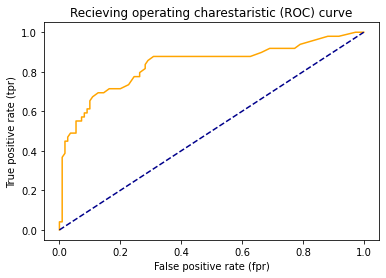

In [21]:
def plot_roc(fpr, tpr):
    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    plt.plot([0,1],[0,1], color='darkblue', label='Guessing', linestyle='--')
    
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Recieving operating charestaristic (ROC) curve')
    plt.show()
    
plot_roc(fpr, tpr)

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8352504638218924

### Confusion Matrics

In [23]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[101,   9],
       [ 20,  29]], dtype=int64)

In [24]:
pd.crosstab(y_test, y_preds, rownames=['actual labels'], colnames=['predictive labels'])

predictive labels,0,1
actual labels,,
0,101,9
1,20,29


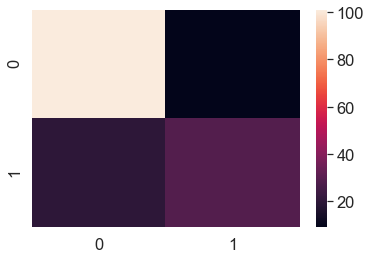

In [25]:
import seaborn as sns

sns.set(font_scale=1.5)

con_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(con_mat);

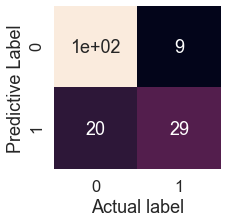

In [26]:
fig, ax = plt.subplots(figsize=(3,3))

ax = sns.heatmap(con_mat, annot=True, cbar=False)

plt.xlabel('Actual label')
plt.ylabel('Predictive Label')

plt.show();

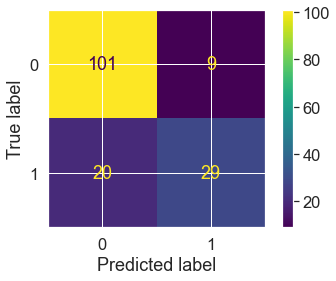

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test);

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.76      0.59      0.67        49

    accuracy                           0.82       159
   macro avg       0.80      0.76      0.77       159
weighted avg       0.81      0.82      0.81       159



In [30]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()

In [31]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
model.score(X_test, y_test)

0.8176100628930818

In [33]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [34]:
y_test.mean()

0.3081761006289308

In [35]:
r2_score(y_test, y_test_mean)

0.0

### Mean Squared Error

In [36]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.18238993710691823